In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./dataset/listings.csv")

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
columns_numeric = [
    "review_scores_value",
    "number_of_reviews",
    "review_scores_rating",
]

columns_percentage = [
   "host_response_rate",
   "host_acceptance_rate",
]

columns_date = [
    "host_since",
]


X = df[columns_numeric].apply(lambda x: x.fillna(x.mean()),axis=0).to_numpy()

y = df["host_is_superhost"]
y= y.to_numpy()
tf = lambda t: 1 if t == 't' else 0;
y = np.array([tf(xi) for xi in y])




In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier

def kfoldMeanVar(splits, C=1):
    model = LogisticRegression(penalty='l1', solver='saga', C=C)
    
    kf = KFold(n_splits=splits)
    meanSquareErrors = []
    for train, test in kf.split(X):
        model = model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse = mean_squared_error(y[test],ypred)
        meanSquareErrors.append(mse)
    return np.mean(meanSquareErrors), np.var(meanSquareErrors), np.std(meanSquareErrors)

/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model

Text(0, 0.5, 'Mean MSE')

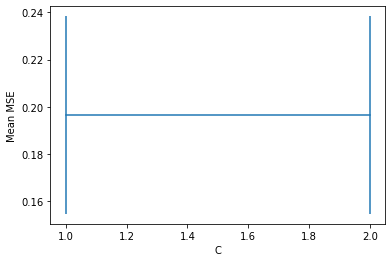

In [21]:
Cs = [1, 2]
meanMSE = []
stdMSE = []
for C in Cs:
    mean, var, std = kfoldMeanVar(8, C)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(Cs, meanMSE, stdMSE)
plt.xlabel("C") ; plt.ylabel("Mean MSE")

In [14]:
df["host_response_rate"]
df["review_scores_value"]
df["host_since"]
df["number_of_reviews"]
df["review_scores_rating"]
df["host_acceptance_rate"][0][:-1]

'100'

Find out what percentage of indices are NaN for a given column.   
If the percentage isn't too bad then fill those NaN's with the average.   
Get rid of the rows that have 3 or more NaNs.

In [8]:
z

,host_response_rate,host_acceptance_rate,review_scores_value,host_since,number_of_reviews,review_scores_rating
0,100%,100%,10.0,2010-08-06,227,95.0
1,NaN,NaN,NaN,2011-03-27,1,NaN
2,100%,100%,10.0,2010-08-06,182,96.0
3,50%,69%,9.0,2011-05-20,110,94.0
4,NaN,100%,10.0,2011-07-01,311,95.0
...,...,...,...,...,...,...
7960,NaN,100%,NaN,2020-10-13,0,NaN
7961,100%,81%,NaN,2014-05-19,0,NaN
7962,NaN,NaN,NaN,2020-02-01,0,NaN
7963,NaN,NaN,NaN,2015-05-10,0,NaN


In [10]:
print(df["host_response_rate"].describe())
print(df["host_acceptance_rate"].describe())
print(df["review_scores_value"].describe())
print(df["host_since"].describe())
print(df["number_of_reviews"].describe())
print(df["review_scores_rating"].describe())

count     3248
unique      45
top       100%
freq      2217
Name: host_response_rate, dtype: object
count     4566
unique      85
top       100%
freq      1709
Name: host_acceptance_rate, dtype: object
count    6337.000000
mean        9.269055
std         0.912029
min         2.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: review_scores_value, dtype: float64
count           7965
unique          2401
top       2017-11-28
freq              50
Name: host_since, dtype: object
count    7965.000000
mean       33.350282
std        62.514644
min         0.000000
25%         1.000000
50%         7.000000
75%        35.000000
max       688.000000
Name: number_of_reviews, dtype: float64
count    6351.000000
mean       93.556448
std         8.573880
min        20.000000
25%        91.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64


In [16]:
tf = lambda t: 1 if t == 't' else 0;
y = df["host_is_superhost"]
y= y.to_numpy()
y = np.array([tf(xi) for xi in y])
y

array([1, 0, 1, ..., 0, 0, 0])

Text(0.5, 0, 'y')

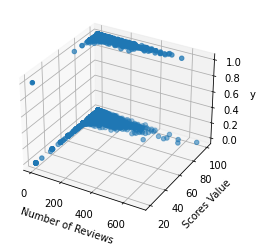

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, x2, y)
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Scores Value')
ax.set_zlabel('y')